In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [64]:
# Loading Data Set
x_train = np.array([1.0, 2.0, 3.0]) # Land area in 1000 sqft
y_train = np.array([300.0, 500.0, 700.0]) # cost in 1000s of dollars

In [65]:
# w -> Slope
# b -> constant
# x[i] -> input label


def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b  # Cost function (simple slope function i.e y = mx + c)
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [66]:
def compute_gradient(x, y, w, b):
  m=x.shape[0]
  dj_dw=0
  dj_db=0

  for i in range(m):
    f_wb = w*x[i] + b
    dj_dw_i = (f_wb - y[i])*x[i]
    dj_db_i = (f_wb - y[i])
    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [67]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
  j_history = []
  p_history = []
  b = b_in
  w = w_in

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(x, y, w, b)

    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    if i < 100000:
      j_history.append( cost_function(x, y, w, b))
      p_history.append([w, b])
    if i % math.ceil(num_iters/10) == 0:
      print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e} ",
            f"dj_dw: {dj_dw : 0.3e}, dj_db: {dj_db : 0.3e} ",
            f"w : {w : 0.3e}, b : {b : 0.5e}")

  return w, b, j_history, p_history

In [68]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 1.23e+05  dj_dw: -1.133e+03, dj_db: -5.000e+02  w :  1.133e+01, b :  5.00000e+00
Iteration 1000: Cost 6.55e-01  dj_dw:  1.600e-01, dj_db: -3.636e-01  w :  2.013e+02, b :  9.69785e+01
Iteration 2000: Cost 5.91e-02  dj_dw:  4.805e-02, dj_db: -1.092e-01  w :  2.004e+02, b :  9.90924e+01
Iteration 3000: Cost 5.33e-03  dj_dw:  1.443e-02, dj_db: -3.281e-02  w :  2.001e+02, b :  9.97274e+01
Iteration 4000: Cost 4.81e-04  dj_dw:  4.335e-03, dj_db: -9.855e-03  w :  2.000e+02, b :  9.99181e+01
Iteration 5000: Cost 4.34e-05  dj_dw:  1.302e-03, dj_db: -2.960e-03  w :  2.000e+02, b :  9.99754e+01
Iteration 6000: Cost 3.92e-06  dj_dw:  3.912e-04, dj_db: -8.893e-04  w :  2.000e+02, b :  9.99926e+01
Iteration 7000: Cost 3.53e-07  dj_dw:  1.175e-04, dj_db: -2.671e-04  w :  2.000e+02, b :  9.99978e+01
Iteration 8000: Cost 3.19e-08  dj_dw:  3.530e-05, dj_db: -8.024e-05  w :  2.000e+02, b :  9.99993e+01
Iteration 9000: Cost 2.88e-09  dj_dw:  1.060e-05, dj_db: -2.410e-05  w :  2.000e+0

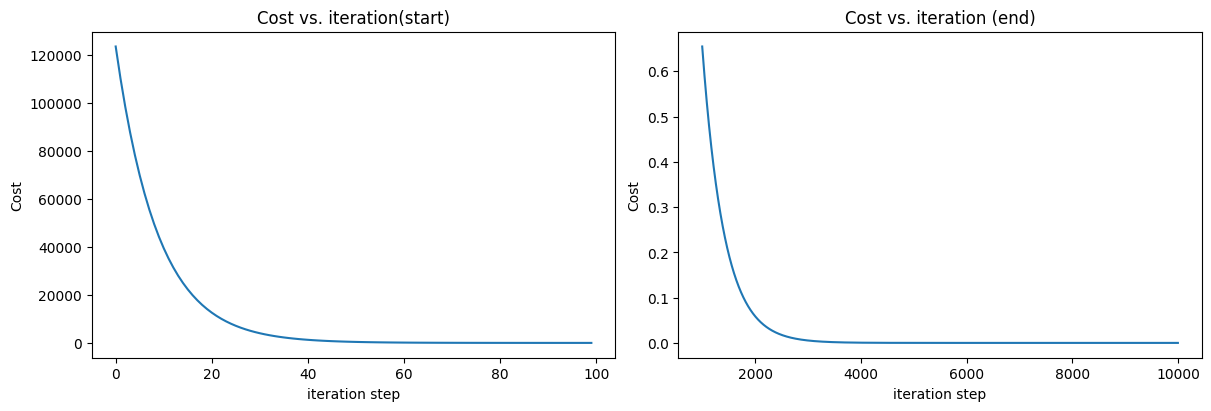

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000 + np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [72]:
# predictions

print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")
print(f"2500 sqft house prediction {w_final*2.5 + b_final:0.1f} thousand dollars")
print(f"2725 sqft house prediction {w_final*2.725 + b_final:0.1f} thousand dollars")
print(f"3000 sqft house prediction {w_final*3.0 + b_final:0.1f} thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
2500 sqft house prediction 600.0 thousand dollars
2725 sqft house prediction 645.0 thousand dollars
3000 sqft house prediction 700.0 thousand dollars
